In [22]:
import pandas as pd
import numpy as np
from scipy import stats

import matplotlib.pyplot as plt

### QUESTION 1 [11 points]

(a) In the scenario below, calculate the appropriate test statistic given the null hypothesis and the relevant data summaries. You may use Python for this question, but make sure to show your work.

$$H_0: \pi_1 \leq \pi_2$$

* $n_1 = 500$, $\widehat{\pi}_1 = \overline{y}_1 = 0.05$
      
* $n_2 = 500$, $\widehat{\pi}_2 = \overline{y}_2 = 0.06$

In [3]:
n1 = 500
n2 = 500
pi_1 = 0.05
pi_2 = 0.06
pi_hat = (n1*pi_1 + n2*pi_2)/(n1+n2)
t_stat = (pi_1 - pi_2)/np.sqrt(pi_hat*(1-pi_hat)*(1/n1+1/n2))
t_stat

-0.6935419821470654

(b) [2 points] Suppose we perform an experiment with two conditions containing $n_1 = 120$ and $n_2 = 110$ units, respectively. For the hypothesis and test statistic below, state the null distribution and calculate the appropriate p-value. You may use Python for this question, but make sure to show your work. $$H_0: \pi_1 \geq \pi_2 \text{ vs. } H_A: \pi_1 < \pi_2$$ 
    
* $t = 1.68$
    
$\;$

In [7]:
# null distribution ~ N(0,1)
# p-value = P(T<=t) 
t = 1.68
p_value = stats.norm.cdf(t)
p_value

0.9535213421362799

(c) [4 points] Consider the following hypothesis scenario. $$H_0: \mu_1 = \mu_2 = \mu_3 \text{ vs. } H_A: \mu_j \neq \mu_k \text{ for some } j \neq k$$ where the number of units in each condition is given by $n_1=499, n_2=498, n_3=506$ and the resulting test statistic calculated from the observed data is $t = 3.5$.

    
i. [1 point] State the null distribution of this test statistic.

    df1 = m-1 = 3-1 = 2 

    df2 = N-m = (499+498+506) - 3 = 1500
    
    null distribution ~ F(2, 1500)


ii. [1 point] Calculate the appropriate p-value. You should use Python for this part, but be sure to state the formula for the p-value in addition to the value calculated in Python. 


In [75]:
df1 = 2 
df2 = 1500

# p_value = P(T>=3.5)
t = 3.5
p_value = 1 - stats.f.cdf(t, dfn=df1, dfd=df2)
print('p-value =', p_value)

p-value = 0.030444234311075125


iii. [1 point] Using a 5\% significance level, state whether you reject or do not reject $H_0$.

    Since the p_value <= 0.05, we have strong evidence against H0 so I reject H0

iv. [1 point] State the rejection region associated with this test at a 5\% significance level. Do you draw the same conlcusion as in part iii.?
    
    Rejection region = {t| t>=3.001723188658652} and it has same conclusion as in part iii. (We reject)

In [37]:
critical_t_value = stats.f.ppf(1-0.05, 2, 1500)
critical_t_value

3.001723188658652

(d) [4 points] Consider the following hypothesis scenario. $$H_0: \pi_1 = \pi_2 = \pi_3 = \pi_4 \text{ vs. } H_A: \pi_j \neq \pi_k \text{ for some } j \neq k$$ where the number of units in each condition is given by $n_1=n_2=n_3=n_4=500$ and the resulting test statistic calculated from the observed data is $t = 3$.
    
    
i. [1 point] State the null distribution of this test statistic.

    m = 4
    null distribution ~ χ²(m-1) => null distribution ~ χ²(3)



ii. [1 point] Calculate the appropriate p-value. You should use Python for this part, but be sure to state the formula for the p-value in addition to the value calculated in Python. 

In [76]:
# p_value = P(T>=3)
t = 3
p_value = 1 - stats.chi2.cdf(t, df=3)
print('p-value =', p_value)

p-value = 0.39162517627108906


iii. [1 point] Using a 5\% significance level, state whether you reject or do not reject $H_0$.
    
    Since the p_value > 0.05, we don't have strong evidence against H0 so I don't reject H0


iv. [1 point] State the rejection region associated with this test at a 5\% significance level. Do you draw the same conlcusion as in part iii.?

    Rejection region = {t| t>=7.814727903251179} and it has same conclusion as in part iii. (Don't reject)

In [39]:
critical_t_value = stats.chi2.ppf(1-0.05, 3)
critical_t_value

7.814727903251179

<div style="page-break-after: always; visibility: hidden"> 
\pagebreak 
</div>

### QUESTION 2 [15 points]

Suppose we are interested in using the $Z$-test for proportions to test the following hypothesis: $$H_0: \pi_1\leq\pi_2 \text{ versus } H_A: \pi_1 > \pi_2$$ where $\pi_j$ is the expected response in condition $j$ assuming $Y_{ij} \sim \text{BIN}(1,\pi_j)$, $i=1,2,\ldots,n_j$, $j=1,2$. Suppose also that interest lies in determining the appropriate sample sizes $n_1$ and $n_2$ to test this hypothesis.

$\;$

(a) [5 points] Assume we want the sample size in condition 1 to be a fixed (and known) multiple of the sample size in condition 2 (i.e., $n_1=k n_2$ for some known constant $k>0$). Show that the sample size in condition 2, $n_2$, required to test this hypothesis at a significance level $\alpha$ and power $1-\beta$ and with a minimum detectable effect of $\pi_1-\pi_2$, is given by $$n_2 = \frac{\left(z_{\alpha} - z_{1-\beta}\right)^2\left[\frac{\pi_1(1-\pi_1)}{k}+\pi_2(1-\pi_2)\right]}{(\pi_1 - \pi_2)^2}$$ where $z_c$ is the value in the standard normal distribution such that $\text{Pr}(Z \geq z_c) = c$.



#### Ans:
Test statistic:
$$T = \frac{\bar{Y}_1 - \bar{Y}_2 - \delta}{\sqrt{\frac{\pi_1(1-\pi_1)}{n_1} + \frac{\pi_2(1-\pi_2)}{n_2}}}$$

Rejection Region: $$R = \{ t \,|\, t \geq z_{\alpha} \}$$


The power of the test:
\begin{align*}
1 - \beta & = P\left(\frac{\bar{Y}_1 - \bar{Y}_2}{\sqrt{\frac{\pi_1(1-\pi_1)}{n_1} + \frac{\pi_2(1-\pi_2)}{n_2}}} \geq z_{\alpha} \mid H_0 \text{ is false}\right) \\
& = P\left(T \geq z_{\alpha} \mid H_0 \text{ is false}\right) \\
& = P\left(T \geq z_{\alpha} \mid H_0 \text{ is false}\right) \\
& = P\left(T \geq z_{\alpha} \mid H_0 \text{ is false}\right) \\
& = P\left(\frac{\bar{Y}_1 - \bar{Y}_2}{\sqrt{\frac{\pi_1(1-\pi_1)}{n_1} + \frac{\pi_2(1-\pi_2)}{n_2}}} \geq z_{\alpha} \mid H_0 \text{ is false}\right) \\
& = P\left(Z \geq z_{\alpha} - \delta\sqrt{\frac{\pi_1(1-\pi_1)}{n_1} + \frac{\pi_2(1-\pi_2)}{n_2}} \right) \\
\text{for } \delta = \pi_1 - \pi_2 \neq 0 \\
z_{1-\beta} & = z_{\alpha} - \delta\sqrt{\frac{\pi_1(1-\pi_1)}{n_1} + \frac{\pi_2(1-\pi_2)}{n_2}} \\
\text{Now, solve for } n_2 \text{ given that } n_1=k n_2:\\
\pi_1(1-\pi_1)n_1 + \pi_2(1-\pi_2)n_2 & = (z_{\alpha} - z_{1-\beta})^2\delta^2 \\
n_2 & = \frac{(z_{\alpha} - z_{1-\beta})^2 \left[\frac{\pi_1(1-\pi_1)}{k} + \pi_2(1-\pi_2)\right]}{(\pi_1 - \pi_2)^2}
\end{align*}



(b) [3 points] Based on the equations in part (a), write a sample size determination function in Python called `ssd_z_test_prop` which takes as input `p1`, `p2`, `sig.level`, `power`, and `k`, and that outputs the required integer sample sizes `n1` and `n2`, where

    * `p1`: the best guess of $\pi_1$ 
    * `p2`: the best guess of $\pi_2$
    * `sig.level`: the significance level $\alpha$
    * `power`: the power $1-\beta$
    * `k`: the multiplicative factor relating `n1` to `n2`


    

In [57]:
def ssd_z_test_prop(p1, p2, sig_level, power, k):
    z_a = stats.norm.ppf(1 - sig_level)
    z_p = stats.norm.ppf(1- power)
    
    # Calculate the difference in proportions (delta)
    delta = np.abs(p1 - p2)
    
    # Calculate the required sample size for the second group (n2)
    n2 = (z_a - z_p)**2 * ((p1 * (1 - p1)) / k + p2 * (1 - p2)) / (delta**2)
    n1 = k * n2
    
    return int(n1), int(n2)

(c) [1 point] Using your function from part (b), determine the sample sizes required in each condition to test the hypothesis above, assuming Type I and Type II error rates of 5%, and assuming $\pi_1= 0.05$ and $\pi_2= 0.06$ and $k=1$.

$\;$

In [58]:
p1 = 0.05
p2 = 0.06
k = 1
sig_level = 0.05
power = 1 - 0.05
n1, n2 = ssd_z_test_prop(p1, p2, sig_level, power, k)
print('n1: ', n1)
print('n2: ', n2)

n1:  11244
n2:  11244


(d) [1 point] Using your function from part (b), determine the sample sizes required in each condition to test the hypothesis above, assuming Type I and Type II error rates of 5%, and assuming $\pi_1= 0.05$ and $\pi_2= 0.06$ and $k=1.5$.

$\;$

In [59]:
p1 = 0.05
p2 = 0.06
k = 1.5
sig_level = 0.05
power = 1 - 0.05
n1, n2 = ssd_z_test_prop(p1, p2, sig_level, power, k)
print('n1: ', n1)
print('n2: ', n2)

n1:  14296
n2:  9530


(e) [5 points] Experiments are commonly run with the involvement of several stakeholders. And it is typical for these stakeholders to disagree on their Type I and Type II error risk tolerances. As such, there is usually ambiguity concerning the values of $\alpha$ and $1-\beta$ that should be used in the sample size determination. As such, it is good practice to perform sample size calculations across a range of plausible values and summarize the results visually with plots.

Using your function from part (b), construct a plot of $n_2$ versus $1-\beta$. Consider $1-\beta$ in the range $[0.8, 0.99]$, and assume $\pi_1=0.05$, $\pi_2=0.06$, and $k=1$. On this plot, include different curves (and a legend that distinguishes them) corresponding to $\alpha \in \{0.001, 0.005, 0.01, 0.05, 0.1\}$. Be sure to appropriately label your axes. Briefly describe the patterns you observe in this plot.

`As the significance level increases, the curves shift downward, indicating a decrease in the required sample size`

`Across all curves, as the power (1−β) increases, the required sample size (n2) generally increases`

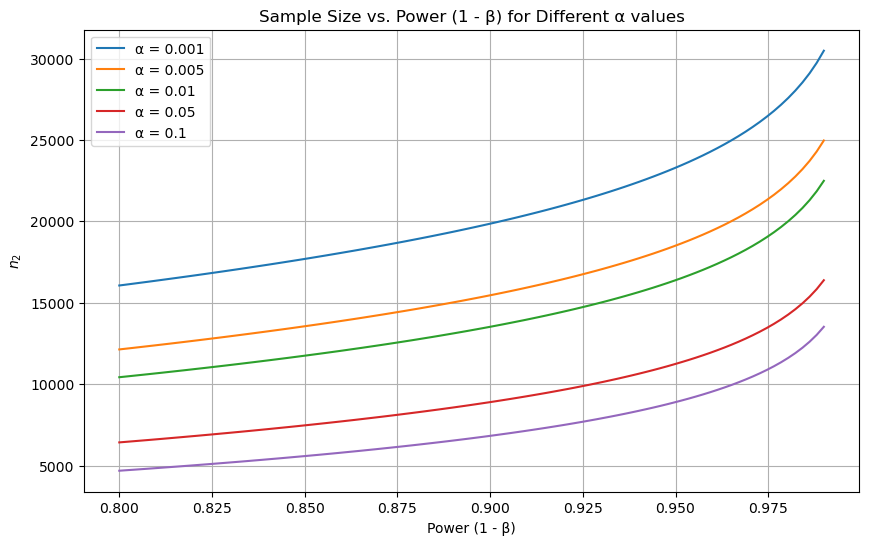

In [62]:
p1 = 0.05
p2 = 0.06
k = 1
sig_level = [0.001, 0.005, 0.01, 0.05, 0.1]
power = np.linspace(0.8, 0.99, 100)

n2_values = {alpha: [ssd_z_test_prop(p1, p2, alpha, p, k)[1] for p in power] for alpha in sig_level}

# Plotting
plt.figure(figsize=(10, 6))
for alpha, n2_list in n2_values.items():
    plt.plot(power, n2_list, label=f'α = {alpha}')

plt.title('Sample Size vs. Power (1 - β) for Different α values')
plt.xlabel('Power (1 - β)')
plt.ylabel('$n_2$')
plt.legend()
plt.grid(True)
plt.show()

<div style="page-break-after: always; visibility: hidden"> 
\pagebreak 
</div>

### QUESTION 3 [29 points]

[Stitch Fix](https://www.stitchfix.com/) is an online personal styling service that helps take the stress out of shopping for clothes. As a new client you complete a "style quiz" in which you disclose your personal measurements, sizes, preferred fit, preferred styles, and a budget. You are then matched to a personal styler who handpicks clothing, footwear and accessories to match your unique sizes and tastes. Then, at regular intervals in time, your "Fix" (a five-item shipment) is mailed to you. Upon receiving your Fix you may choose to keep 0-5 items and return (for free) any items that you do not wish to purchase. A non-refundable \$20 "styling fee" is charged for each Fix, independent of the number of items you keep. However, this \$20 is applied as credit toward any items that you do keep.

In the interests of client satisfaction and inventory management, Stitch Fix would like to minimize the *task-completion time* (TCT), the time (in days) between a client submitting their style quiz, and the client's Fix being ready for shipment. This time is influenced in part by inventory, warehousing, and supply chain issues, but is also influenced by the time it takes the Fix to be curated by the stylist. The data scientists on the Stylist & CX Algorithms team are interested in investigating whether average TCT can be reduced by augmenting or replacing the human stylist with a recommendation algorithm. To investigate this they run an experiment with $m=3$ conditions:

* Condition 1: Fixes are curated solely by a human stylist
* Condition 2: Fixes are curated solely by a machine learning algorithm
* Condition 3: Fixes are curated by a combination of of human and machine input

One thousand clients are randomized into each of these three conditions, and the task-completion time for each client is measured.

(a)	[2 points] What is the metric of interest and what is the corresponding response variable?

    MOI: average task-completion time, Responce variable: measurement of task-completion time itself  

(b)	[2 points] What is the design factor and what are its levels?

    design factor: the way fixes are curated.
    
    levels={by human stylist, by machine learning algorithm, by combination of human and machine input}

(c)	[1 points] What constitutes an experimental unit in this experiment?

    experimental unit: client who is participating in the Stitch Fix study


(d)	[1 point] State the null and alternative hypotheses for a test of overall equality in the context of this experiment. Use the notation $\mu_j$ which represents the metric of interest in condition $j=1,2,3$.
$$
H_0: \mu_1 = \mu_2 = \mu_3
\text{ vs. } H_A:\mu_j\neq\mu_k \text{ for some }j\neq k$$


(e)	[3 points] The file `stitchfix.csv` contains `TCT` measurements for the 3000 clients (1000 in each of the three experimental conditions). Construct side-by-side box plots to visualize the `TCT` distribution in each of the experimental conditions. Comment on which condition appears to minimize task-completion time.

    Comment: Condition 2 (by machine learning algorithm) appears to minimize task-completion time


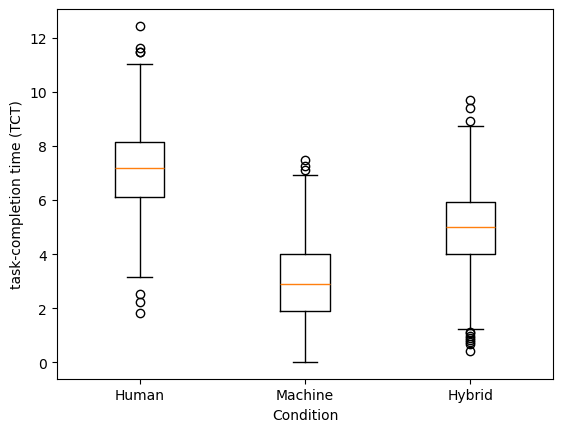

In [29]:
df = pd.read_csv('./data/stitchfix.csv')
y1 = df[df['Condition']=='Human']["TCT"]
y2 = df[df['Condition']=='Machine']["TCT"]
y3 = df[df['Condition']=='Hybrid']["TCT"]

y = [y1, y2, y3]
plt.boxplot(y, labels = ["Human", "Machine", "Hybrid"]);
plt.ylabel("task-completion time (TCT)");
plt.xlabel("Condition");

(f) [3 points] Using the observed data, test the hypothesis in (d) at a 1% significance level. Clearly state your conclusion in the context of the problem, and explain whether this conclusion is surprising, given what you see in the box plots from part (e). **NOTE:** although you may use Python to test this hypothesis, be sure to:

- State the formula and the value of the test statistic

- State the null distribution

- State the formula and the value of the p-value 
  
`Statement:`

`t_stat = MSR/MSE`

`null distribution ~ F(2, 2997)`

`p-value = P(T>=t)`

In [40]:
# m = 3
# N = 3000
# null distribution ~ F(2, 2997)
# t_stat = MSR/MSE
# p-value = P(T>=t)

m = 3
n1 = len(y1)
n2 = len(y2)
n3 = len(y3)
N = n1 + n2 + n3
ybar = np.mean(df["TCT"])
SSC = n1*(np.mean(y1) - ybar)**2 + n2*(np.mean(y2) - ybar)**2 + n3*(np.mean(y3) - ybar)**2 
SSE = np.sum((y1 - np.mean(y1))**2) + np.sum((y2 - np.mean(y2))**2) + np.sum((y3 - np.mean(y3))**2)
t = (SSC/(m-1)) / (SSE/(N-m))
pv = stats.f.sf(t, dfn = m-1, dfd = N-m)
print("t =", t)
print("p-value =", pv)

t = 2000.4765973989809
p-value = 0.0


`Conclusion: Since the p-value < 0.01, we have strong evidence against H0 so I reject H0, meaning that the average TCT in three condition are different. It is not surprising from the plot I see in part (e), the plot also show the similar result: at least one mean is different than others`

(g) [3 points] As a follow-up to part (f), calculate the p-values associated with Student t-tests of each of the following three hypotheses. Note that you need only state the resulting values themselves, and you do not need to justify the use of Student t-tests with F-tests for variances.

$$H_0: \mu_1 \leq \mu_2 \text{ versus } H_A: \mu_1 > \mu_2$$
$$H_0: \mu_1 \leq \mu_3 \text{ versus } H_A: \mu_1 > \mu_3$$
$$H_0: \mu_2 \geq \mu_3 \text{ versus } H_A: \mu_2 < \mu_3$$


In [44]:
# H0: u1<=u2 vs. Ha: u1>u2
t, p1 = stats.ttest_ind(y1, y2, equal_var = True, alternative = 'greater')
print("t =", t)
print("p-value =", p1)

t = 63.09842216100409
p-value = 0.0


In [45]:
# H0: u1<=u3 vs. Ha: u1>u3
t, p2 = stats.ttest_ind(y1, y3, equal_var = True, alternative = 'greater')
print("t =", t)
print("p-value =", p2)

t = 33.11946642646162
p-value = 2.0627641265881884e-192


In [47]:
# H0: u2>=u3 vs. Ha: u2<u3
t, p3 = stats.ttest_ind(y2, y3, equal_var = True, alternative = 'less')
print("t =", t)
print("p-value =", p3)

t = -30.19673331793343
p-value = 1.233965887767345e-165


(h) [6 points] Using the p-values from (g), in this question you will identify the condition that minimizes average task-completion time while controlling the family-wise error rate. Note that you may use `multipletests()` where appropriate.

i. [2 points] Calculate the Bonferroni-adjusted p-values and draw your conclusion assuming we wish to ensure $FWER\leq 0.01$.


In [49]:
import statsmodels.stats.multitest as smsm
p_val = [p1, p2, p3]
res, padj, alphSid, alphBonf = smsm.multipletests(pvals = p_val, alpha = 0.01, method = "bonferroni")
print("Should I reject H0? ", res)
print("The adjusted p-values are: ", padj)

Should I reject H0?  [ True  True  True]
The adjusted p-values are:  [0.00000000e+000 6.18829238e-192 3.70189766e-165]


ii. [2 points] Calculate the Šidák-adjusted p-values and draw your conclusion assuming we wish to ensure $FWER\leq 0.01$.

In [50]:
res, padj, alphSid, alphBonf = smsm.multipletests(pvals = p_val, alpha = 0.01, method = "sidak")
print("Should I reject H0? ", res)
print("The adjusted p-values are: ", padj)

Should I reject H0?  [ True  True  True]
The adjusted p-values are:  [0.00000000e+000 6.18829238e-192 3.70189766e-165]



iii. [2 points] Calculate the Holm-adjusted p-values and draw your conclusion assuming we wish to ensure $FWER\leq 0.01$.

In [51]:
res, padj, alphSid, alphBonf = smsm.multipletests(pvals = p_val, alpha = 0.01, method = "holm")
print("Should I reject H0? ", res)
print("The adjusted p-values are: ", padj)

Should I reject H0?  [ True  True  True]
The adjusted p-values are:  [0.00000000e+000 4.12552825e-192 1.23396589e-165]


(i) [4 points] Suppose that rather than minimizing *average* TCT, interest lies in minimizing the 90th percentile, $Q(0.90)$, of the TCT distribution. In this case, such an investigation may begin with a gatekeeper test of $$H_0: Q_1(0.90)=Q_2(0.90)=Q_3(0.90) ~~ \text{versus} ~~ H_A: Q_j(0.90)\neq Q_k(0.90) \text{ for some }j\neq k.$$ In an enumerated list (like the one on pages 7/8 of the Lecture 3 notes), describe how this hypothesis may be tested with a randomization test. Be sure to carefully define an appropriate test statistic,
provide an explanation of what values provide evidence against $H_0$, and explicitly state the formula for
the corresponding p-value calculation.


`Use this as test statistic` $$ t = |(Q_1(0.90)-Q_2(0.90))| + |(Q_1(0.90)-Q_3(0.90))| + |(Q_2(0.90)-Q_3(0.90))|$$

`Calculate the observed test statistic using the actual data`

`Randomization Procedure`:
- Pool the data from all groups.
- Randomly permute the group labels to create a new set of data under the null hypothesis. ( simulate the scenario where there is no difference in the 90th percentiles between groups.)

`Calculate Test Statistic for Randomized Data`
- calculate the test statistic (t_star) using the same formula.

`Repeat randomization and caculate t_star steps N times`

`P value`
- p_value = # of t_star that are as extreme as t / N

(j) [1 point] Stitch Fix considers a Fix to be "successful" if the majority ($\geq3$) of its items are kept. Maximizing *Fix success rate* (FSR), the proportion of Fixes for which 3 or more items are kept, is of interest. Like the task-completion time, Fix success rate is believed to be influenced by whether the Fix is curated by a human stylist, a recommendation algorithm, or a hybrid of the two. To investigate this, in the same experiment described above, the data scientists also recorded a binary indicator for each client which takes the value 1 if the client's Fix was a success, and 0 otherwise. State the null and alternative hypotheses for a test of overall equality of FSRs across the three conditions. Use the notation $\pi_j$ which represents the FSR in condition $j=1,2,3$.


- Null Hypothesis $$H_0: \pi_1 = \pi_2 = \pi_3$$

- Alternative Hypothesis $$H_A: \text{At least one of } \pi_j \text{ differs from the others}$$


(k) [3 points] Using the `Fix.Success` data in the `stitchfix.csv` file, test the hypothesis in (j) at a 1% significance level. **NOTE:** although you may use Python to test this hypothesis, be sure to:

- State the formula and the value of the test statistic

- State the null distribution

- State the formula and the value of the p-value 

`Statement:`

`m = 3`

$$tstat = \sum_{l=0}^1 \sum_{j=1}^3 \frac{(O_{l,j} - E_{l,j})^2}{E_{l,j}}$$


$$\text{null distribution} \sim \chi^2(2)$$


`p-value = P(T>=t)`

In [74]:
y1 = df[df['Condition']=='Human']["Fix.Success"]
y2 = df[df['Condition']=='Machine']["Fix.Success"]
y3 = df[df['Condition']=='Hybrid']["Fix.Success"]

y1_t = len(y1[y1.values==1])
y1_f = len(y1[y1.values!=1])

y2_t = len(y2[y2.values==1])
y2_f = len(y2[y2.values!=1])

y3_t = len(y3[y3.values==1])
y3_f = len(y3[y3.values!=1])

tab = [[y1_t, y2_t, y3_t], [y1_f, y2_f, y3_f]]
t, pv, df, expected = stats.chi2_contingency(tab, correction = False)
print("t =", t)
print("p-value =", pv)

t = 57.491289198606275
p-value = 3.2803876770015476e-13


`Conclusion: Since the p-value < 0.01, we have strong evidence against H0 so I reject H0, meaning that the average FSR in three condition are different.`